# Step 0. Definition

In [1]:
#import dtnmonitor_v2 as dtn
import dtn_module.dtnmonitor_v3  as DtnModule
import os,sys
import getpass
import subprocess

dtn = DtnModule.DTNMonitor()

user=getpass.getuser()

DtnModule.show_interface()

DtnModule.show_nvme()

## this is necessary to show exec info in notebook
def exec_print(command):
    process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
    for line in iter(process.stdout.readline, b''):
        # system print
        sys.stdout.write(line)   

Network Interface                        IP                   
lo                                       127.0.0.1            
enp21s0                                  165.124.3.75         
ens1f0                                   192.168.1.2          
ens4f0.2038                              10.250.38.52         
ens4f0.3064                              192.168.64.52        
ens4f1.3065                              192.168.65.52        
docker0                                  172.17.0.1           
Disk mountpoint                     size     avail   used%  
/dev                                126G     126G    0%     
/run                                26G      26G     1%     
/                                   28G      18G     32%    
/dev/shm                            126G     126G    1%     
/run/lock                           5.0M     5.0M    0%     
/sys/fs/cgroup                      126G     126G    0%     
/home                               190G     162G    15%    
/run/use

# Step 1. Parameter Setting

In [2]:
### P1. SELECT THE MONITOR NETWORK INTERFACE
## used in Step 1,2,3 , if you don't know the interface name, you can use 'all'
## make sure the interface is correct, error_naming or without network flow will get empty grath
#dtn.interface = 'eth0.1301'
#dtn.interface = 'eth0.2038' 
#dtn.interface = 'ens1f0.3061'
#dtn.interface = 'eth1'
dtn.interface = 'all'


### P2. SELECT THE INPUT FILE , 
## used in Step 1 : file IO read file



file_read_nuttcp=[
"/data/disk0/sc17/100gtest",
"/data/disk1/sc17/100gtest",
"/data/disk2/sc17/100gtest",
"/data/disk3/sc17/100gtest",
"/data/disk4/sc17/100gtest",
"/data/disk5/sc17/100gtest",
"/data/disk6/sc17/100gtest",
"/data/disk7/sc17/100gtest",
    # "/foo/bar/filennn"
     ]

# file2_read_nuttcp=[
# "/data/disk0/sc17/fftest",
# "/data/disk1/sc17/fftest",
# "/data/disk2/sc17/fftest",
# "/data/disk3/sc17/fftest",
# "/data/disk4/sc17/fftest",
# "/data/disk5/sc17/fftest",
# "/data/disk6/sc17/fftest",
# "/data/disk7/sc17/fftest",
#     # "/foo/bar/filennn"
#      ]

### P3. NUTTCP SERVER IP 
## used in Step 2,3 : input nuttcp server's ip
nuttcp_server="localhost"

### P4. NUTTCP THREADS
## used in Step 2,3 :input threads number
count = len(file_read_nuttcp)


# Step 2. Test network transfer by disk

In [6]:
for i in range(count):
    command = "nuttcp -r -i1 -sdz -xc "+str(i)+" -w 110M -P 5300"+str(i)+" -p 5310"+str(i)+ " "+ nuttcp_server +" > "+ file_read_nuttcp[i] +" & "
    print(command)
    os.system(command)
    #command = "nuttcp -t -i1 -sdz -xc "+str(i)+" -w 110M -P 5320"+str(i)+" -p 5330"+str(i)+ " "+ nuttcp_server +" < "+ file2_read_nuttcp[i] +" & "
    #print(command)
    #os.system(command)
 



nuttcp -r -i1 -sdz -xc 0 -w 110M -P 53000 -p 53100 localhost > /data/disk0/sc17/100gtest & 
nuttcp -r -i1 -sdz -xc 1 -w 110M -P 53001 -p 53101 localhost > /data/disk1/sc17/100gtest & 
nuttcp -r -i1 -sdz -xc 2 -w 110M -P 53002 -p 53102 localhost > /data/disk2/sc17/100gtest & 
nuttcp -r -i1 -sdz -xc 3 -w 110M -P 53003 -p 53103 localhost > /data/disk3/sc17/100gtest & 
nuttcp -r -i1 -sdz -xc 4 -w 110M -P 53004 -p 53104 localhost > /data/disk4/sc17/100gtest & 
nuttcp -r -i1 -sdz -xc 5 -w 110M -P 53005 -p 53105 localhost > /data/disk5/sc17/100gtest & 
nuttcp -r -i1 -sdz -xc 6 -w 110M -P 53006 -p 53106 localhost > /data/disk6/sc17/100gtest & 
nuttcp -r -i1 -sdz -xc 7 -w 110M -P 53007 -p 53107 localhost > /data/disk7/sc17/100gtest & 


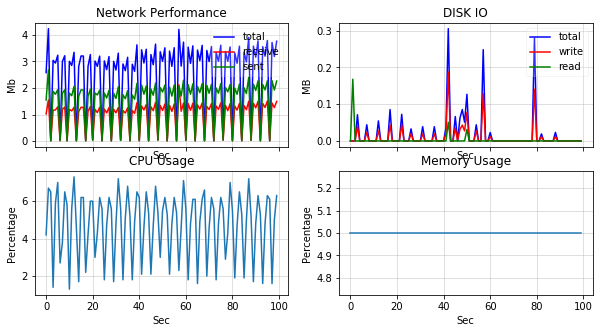

In [7]:
dtn.run_monitor(timeout=None)

# Step A . stop the test nuttcp

In [5]:
dtn.stop()

exec_print("pkill nuttcp")

exec_print("sleep 3; ps -u "+ user +" ux |grep nuttcp")

root     13156  0.0  0.0   4500   708 ?        S    09:29   0:00 /bin/sh -c sleep 3; ps -u root ux |grep nuttcp
root     13189  0.0  0.0  14220  1032 ?        S    09:30   0:00 grep nuttcp
